In [17]:
import os
from mlflow import MlflowClient
from mlflow.entities import ViewType

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# %matplotlib widget
%matplotlib inline

In [18]:
tracking_uri = '/home/nazya/mlruns/' + os.getcwd().split('/')[-1]
experiment_name = 'Default'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


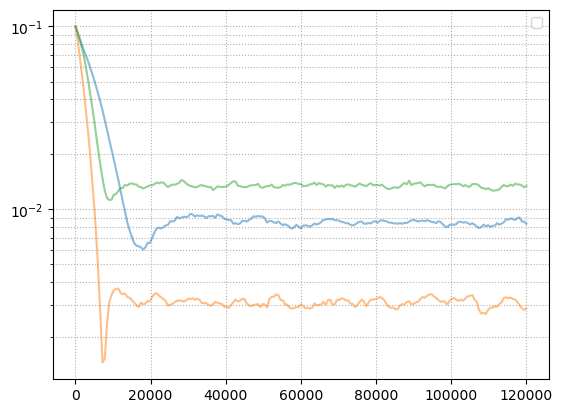

In [58]:
client = MlflowClient(tracking_uri=tracking_uri)
e = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(
    experiment_ids=[e.experiment_id],
    filter_string='')
# ,
    # run_view_type=ViewType.ACTIVE_ONLY)
for r in runs:
    history = client.get_metric_history(run_id=r.info.run_id, key='dist')
    steps = [h.step for h in history]
    values = [h.value for h in history]
    timestamps = [h.timestamp for h in history]
    plt.plot(timestamps, values, alpha=0.5)
         # color=colors[config.optimizer.optimizer_type.name],
         # marker=config.optimizer.optimizer_type.value, markevery=10,
         # label="%s" % config.optimizer.optimizer_type.name)

plt.yscale('log')
plt.xscale('linear')
plt.grid(True, which="both", ls='dotted')
plt.legend()
plt.show()

In [20]:
history = client.get_metric_history(run_id=runs[0].info.run_id, key='dist')

In [22]:
m[0]

<Metric: key='dist', step=0, timestamp=0, value=0.10000000149011612>

In [ ]:
labels = list(OptimizerType)
labels = [i.name for i in labels]
colors = {labels[i] : list(mcolors.TABLEAU_COLORS.keys())[i] for i in range(0, len(OptimizerType))}